# Assignment 3 : Design Problem


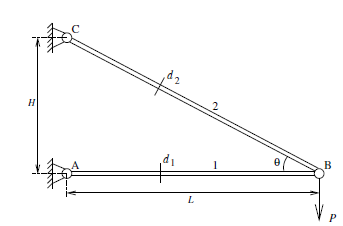        

Question a) Show that the optimization problem in negative null form can be stated as:

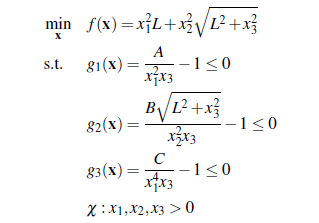      

and give expressions for A, B, and C in terms of constant parameters σy, s, L, ρ, E, and P.

Given our bar material, bar length L = 12.5 [cm], external force, and safety factor, we get: A = 100 [cm^3], B = 8 [cm^2], and C = 3000 [cm^5].

Refer: https://docs.scipy.org/doc/scipy/tutorial/optimize.html for scipy.optimize

In [ ]:
# Question B and C 

import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Constants
L = 12.5
A = 100
B = 8
C = 3000

# Objective function
def objective(x):
    ##### Complete code here #####
    obj = ...   
    ##########
    return (obj)

# Nonlinear inequality constraints (g(x) <= 0)
def nonlinear_constraints(x):
    ##### Complete code here #####
    g1 = ... 
    g2 = ... 
    g3 = ... 
    ##########
    return np.array([g1, g2, g3])

# Bounds (x1, x2, x3 > 0)
bounds = [...]

# Initial guess 
x0 = np.array(...)  

# Constraints dictionary
constraints = [
    {'type': 'ineq', 'fun': lambda x: -nonlinear_constraints(x)[0]},  
    {'type': 'ineq', 'fun': lambda x: -nonlinear_constraints(x)[1]},  
    {'type': 'ineq', 'fun': lambda x: -nonlinear_constraints(x)[2]}   
]

# Solve the optimization problem
result = minimize(
    ...
)

# Results
print("Optimal solution:", result.x)
print("Objective value:", result.fun)
print("Success:", result.success)
print("Exit flag (status):", result.status)
print("Message:", result.message)

# Verify constraints
g = nonlinear_constraints(result.x)
print("\nConstraint values (should be <= 0):")
print("g1:", g[0])
print("g2:", g[1])
print("g3:", g[2])

# Gradient at the solution
if result.success:
    print("\Gradient at the solution:")
    print("For x[0]:", result.jac[0])  
    print("For x[1]:", result.jac[1])  
    print("For x[2]:", result.jac[2]) 
else:
    print("\nOptimization failed. Gradients are not available.")

In [ ]:
# Visualization

def plotNonlin3(x, fval, L, A, B, C):
    x1vector = np.arange(0, 20.2, 0.2)
    x2vector = np.arange(0, 20.2, 0.2)
    x1vectorObj = np.arange(0, 5.2, 0.2)

    vecSize = len(x1vector)
    vecSizeObj = len(x1vectorObj)

    X1, X2 = np.meshgrid(x1vectorObj, x1vectorObj)
    objSurf = np.sqrt((fval - (X1**2 * L)) / (X2**2) - L**2)
    objSurf = np.real(objSurf)
    objSurf[objSurf == 0] = -0.5  

    g1 = A / (x1vector**2 * x[2])
    g2 = B * np.sqrt(L**2 + x[2]**2) / (x2vector**2 * x[2])
    g3 = C / (x1vector**4 * x[2])

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(X1, X2, objSurf, color=[0, 0.7, 0], edgecolor='none', alpha=0.5)

    for x2_val in x2vector:
        ax.plot(x1vector, np.full_like(x1vector, x2_val), g1, color='k', alpha=0.3)
    for x1_val in x1vector:
        ax.plot(np.full_like(x2vector, x1_val), x2vector, g2, color='k', alpha=0.3)
    for x2_val in x2vector:
        ax.plot(x1vector, np.full_like(x1vector, x2_val), g3, color='k', alpha=0.3)

    ax.scatter(x[0], x[1], x[2], color='r', marker='*', s=100)

    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_zlabel('$x_3$')
    ax.set_zlim([0, 30])
    ax.view_init(elev=16, azim=132.4)

    plt.show()

plotNonlin3(result.x, result.fun, L, A, B, C)


In [ ]:
# Question D

import numpy as np
from scipy.optimize import minimize

L = 12.5
A = 100
B = 8
C = 3000

# Objective function
def func3D(x, L):
    f = ...
    return f

# Gradient of objective function
def grad_func3D(x, L):
    gradf = np.array([
        ...
    ])
    return gradf

# Define Constraints
def constr3D(x, L, A, B, C):
    g = np.array([
        ...
    ])
    h = np.array([])  
    return g, h

# Gradient of constraints
def grad_constr3D(x, L, A, B, C):
    gradg = np.array([
        ...
    ])
    gradh = np.array([])  
    return gradg, gradh

def constraints(x):
    g, h = constr3D(x, L, A, B, C)
    gradg, gradh = grad_constr3D(x, L, A, B, C)
    return {
        'type': 'ineq',
        'fun': lambda x: -constr3D(x, L, A, B, C)[0],  # Negative because scipy uses g(x) >= 0
        'jac': lambda x: -grad_constr3D(x, L, A, B, C)[0]  
    }

def objective(x):
    return func3D(x, L), grad_func3D(x, L)

# Initial Guess
x0 = np.array(...)  

# Lower and upper bounds
bounds = [...]

cons = constraints(x0)

# Play with solvers and options
result = minimize(
    ...   
)

# Display results
print("Optimal solution (x):", result.x)
print("Objective value at solution:", result.fun)
print("Exit flag:", result.status)
print("Output:", result.message)

Question e)

Verify whether the calculated optimum solution satisfies the KKT conditions using the computed Lagrange multiplier value(s). (refer to lecture Conditions for Optimality. NOTE: you do not need to re-calculate the Langrange multiplier values yourself.)

Question f)

Comment on the solution you have obtained; do you trust it and why?

In [ ]:
# Question G - Increase the solution accuracy to 10^−8, and increase the maximum allowed number of function evaluations.

import numpy as np
from scipy.optimize import minimize

# Constants
L = 12.5
A = 100
B = 8
C = 3000

def func3D(x, L):
    f = ...
    return f

def grad_func3D(x, L):
    gradf = np.array([
        ...
    ])
    return gradf

def constr3D(x, L, A, B, C):
    g = np.array([
        ...
    ])
    h = np.array([])  
    return g, h

def grad_constr3D(x, L, A, B, C):
    gradg = np.array([
       ...
    ])
    gradh = np.array([])  
    return gradg, gradh

def constraints(x):
    g, h = constr3D(x, L, A, B, C)
    gradg, gradh = grad_constr3D(x, L, A, B, C)
    return {
        'type': 'ineq',
        'fun': lambda x: -constr3D(x, L, A, B, C)[0],  # Negative because scipy uses g(x) >= 0
        'jac': lambda x: -grad_constr3D(x, L, A, B, C)[0]  
    }

def objective(x):
    return func3D(x, L), grad_func3D(x, L)

x0 = np.array(...)

bounds = [...]

cons = constraints(x0)

# Play with solvers and options
result = minimize(
    ...
)

# Display results
print("Optimal solution (x):", result.x)
print("Objective value at solution:", result.fun)
print("Exit flag:", result.status)
print("Output:", result.message)